# Global Power Plant Database

Problem Statement:


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:

-  country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
-  country_long (text): longer form of the country designation
-  name (text): name or title of the power plant, generally in Romanized form
-  gppd_idnr (text): 10 or 12 character identifier for the power plant
-  capacity_mw (number): electrical generating capacity in megawatts
-  latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-  longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
-  primary_fuel (text): energy source used in primary electricity generation or export
-  other_fuel1 (text): energy source used in electricity generation or export
-  other_fuel2 (text): energy source used in electricity generation or export
-  other_fuel3 (text): energy source used in electricity generation or export
-  commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
-  owner (text): majority shareholder of the power plant, generally in Romanized form
-  source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
-  url (text): web document corresponding to the source field
-  geolocation_source (text): attribution for geolocation information
-  wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
-  year_of_capacity_data (number): year the capacity information was reported
-  generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013  
-  generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
-  generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
-  generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
-  generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
-  generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
-  generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
-  generation_data_source (text): attribution for the reported generation information
-  estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
-  estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
-  estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
-  estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
-  estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
-  estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
-  estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
-  estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
-  estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
-  estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation:

-  We define the "Fuel Type" attribute of our database based on common fuel categories.


Prediction 

-  Fuel Type
-  capacity_mw

importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Global power plant database.csv')

df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Findings:

-  12 object and 15 numerical columns
-  Several columns have been identified with only 1 unique value
-  some have been identified as containing only null values


In [7]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [8]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [9]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [10]:
df.drop(columns=["other_fuel2","year_of_capacity_data","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1,inplace=True)


In [11]:
df['name'].value_counts()

KUNDARKI TPP                    1
Jodiya Wind Farm                1
SOUTHERN REPL.                  1
Yelesandra Solar Power Plant    1
BHADRAVATI MILL                 1
                               ..
RATNAGIRI GAS                   1
SUGEN CCCP                      1
SEWA-III                        1
Bonada Solar Power Plant        1
ARVINDNAGAR SUGAR               1
Name: name, Length: 907, dtype: int64

In [12]:
df.drop("name",axis=1,inplace=True)

In [13]:
df["gppd_idnr"].value_counts()

WRI1026075    1
WRI1019941    1
IND0000460    1
IND0000493    1
IND0000419    1
             ..
IND0000219    1
IND0000302    1
WRI1019967    1
IND0000365    1
IND0000418    1
Name: gppd_idnr, Length: 907, dtype: int64

In [14]:
df.drop("gppd_idnr",axis=1,inplace=True)

In [15]:
df["owner"].value_counts()

Acc Acc ltd                                              4
Jk Cement ltd                                            4
Sterling Agro Industries ltd.                            4
Jaypee Ltd jccl)                                         3
Maharashtra State Power Generation Co Ltd (MAHAGENCO)    3
                                                        ..
Hiraco Renewable Energy Private Limited (HREPL)          1
Shamanur Sugars ltd                                      1
NMDC                                                     1
Taxus Infrastructure and Power Projects Pvt Ltd          1
Tadas Wind Energy Private Limited                        1
Name: owner, Length: 280, dtype: int64

In [16]:
df.drop("owner",axis=1,inplace=True)


In [17]:
df.drop("url",axis=1,inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2013  0 non-null      float64
 9   generation_gwh_2014  398 non-null    float64
 10  generation_gwh_2015  422 non-null    float64
 11  generation_gwh_2016  434 non-null    float64
 12  generation_gwh_2017  440 non-null    float64
 13  generation_gwh_2018  448 non-null    float64
 14  generation_gwh_2019  0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 

In [19]:
df.drop(columns=["generation_gwh_2013","generation_gwh_2019"],axis=1,inplace=True)


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             861 non-null    float64
 2   longitude            861 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   other_fuel1          198 non-null    object 
 5   commissioning_year   527 non-null    float64
 6   source               907 non-null    object 
 7   geolocation_source   888 non-null    object 
 8   generation_gwh_2014  398 non-null    float64
 9   generation_gwh_2015  422 non-null    float64
 10  generation_gwh_2016  434 non-null    float64
 11  generation_gwh_2017  440 non-null    float64
 12  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.2+ KB


In [21]:
#Managing null values

df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape

(907, 13)

In [23]:
df.isnull().sum()


capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [25]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#Findings:

-  longitude, commissioning_year, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 have high skewness with some far reaching outliers.
-  latitude is numerical in nature with very low skewness and outliers.
-  other_fuel1 and geolocation_source are object data types

In [26]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df["latitude"] = df['latitude'].fillna(df['latitude'].mean())
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [27]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [28]:
#extraction

df['capacity_mw'].value_counts()


5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [29]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [30]:
df['commissioning_year'].value_counts()


2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [31]:
#We can extract insights from plant age instead of using the information on when the plant was commissioned.



df['plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [32]:
df.head(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
5,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
6,60.0,10.4547,77.0078,Hydro,Oil,Central Electricity Authority,WRI,157.558250,152.195200,61.421350,89.629600,48.327150,49.0
7,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0
9,210.0,23.1642,81.6373,Coal,Oil,Central Electricity Authority,WRI,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,11.0


In [33]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


#Primary Findings
-  no more null values in the dataset
-  there is presence of lot of outliers, with skewness across columns

In [34]:
#Checking categorical and numerical features for data analysis and visualization


In [35]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [36]:
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'plant_age']


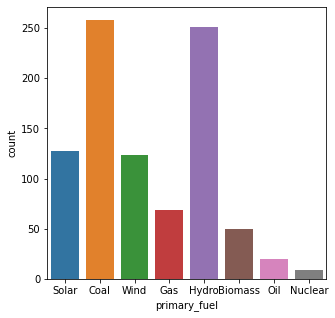

In [37]:
#Data Visualization
plt.figure(figsize=(5,5))
sns.countplot(df['primary_fuel'])
plt.show()

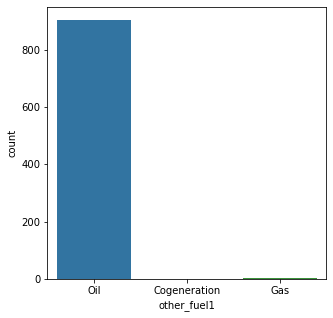

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(df['other_fuel1'])
plt.show()

In [39]:
print(df["other_fuel1"].value_counts())

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


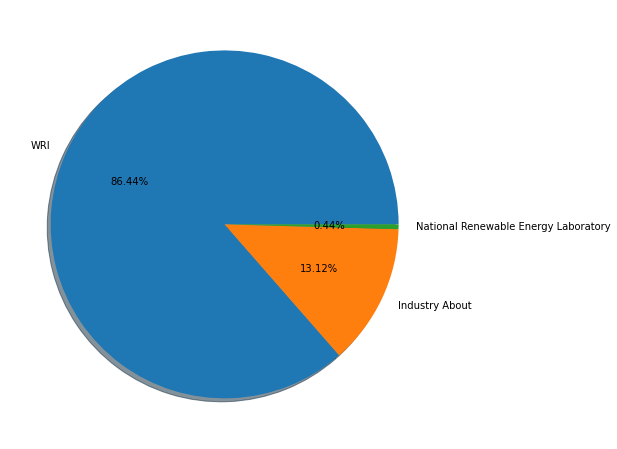

In [40]:
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

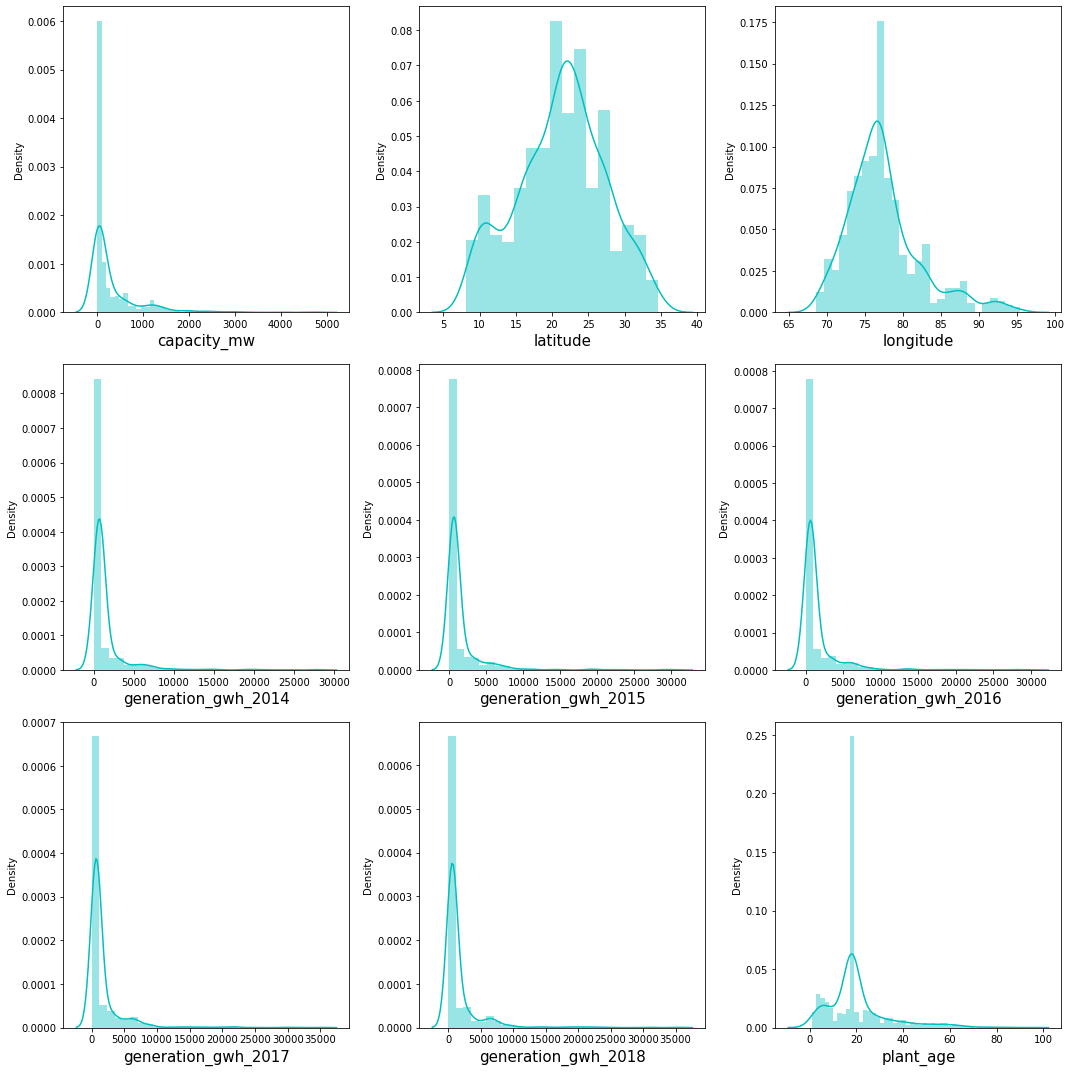

In [41]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='c')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()

#Findings:

-  Data is not normally distributed, except in latitude and logitude, with longitude having some skewness.
-  All other numerical columns show right skewness

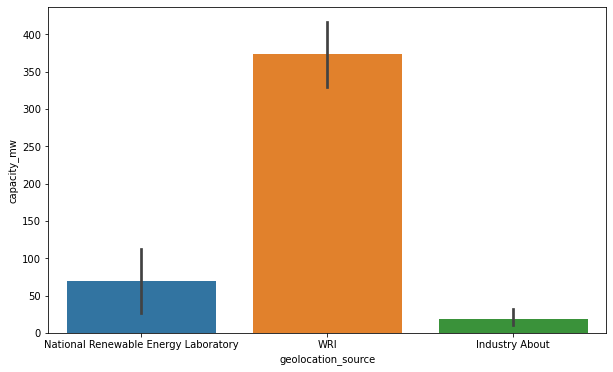

In [42]:
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

<AxesSubplot:title={'center':'Comparision between plant_age and capacity_mw'}, xlabel='plant_age', ylabel='capacity_mw'>

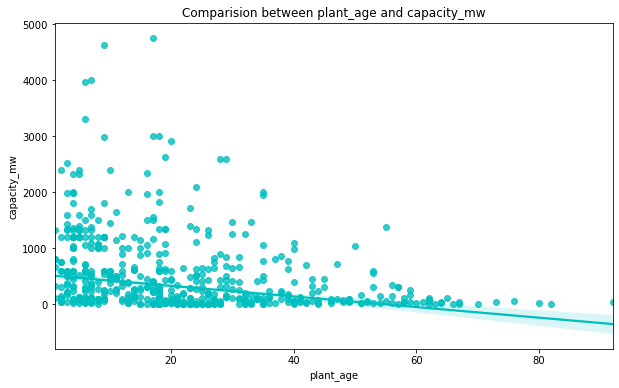

In [43]:
plt.figure(figsize=[10,6])
plt.title('Comparision between plant_age and capacity_mw')
sns.regplot(df['plant_age'],df['capacity_mw'],color = "c")

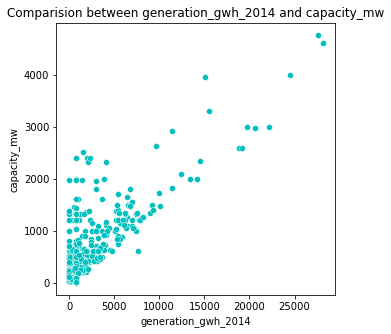

In [44]:
plt.figure(figsize = (5,5))
plt.title("Comparision between generation_gwh_2014 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw", data = df,color="c")
plt.show()

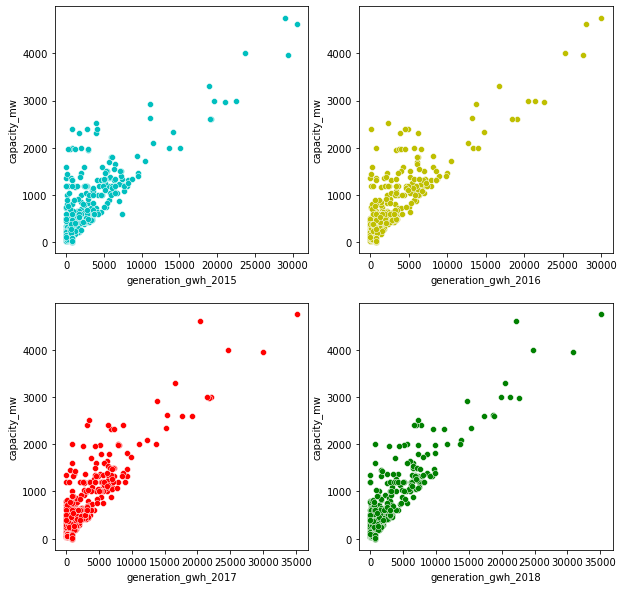

In [45]:
fig,axes=plt.subplots(2,2,figsize=(10,10))

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="c")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="y")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="r")

# Checking generation growth in 2018
sns.scatterplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()

#Findings:

-  postive linear relationship between generation_gwh_yyyy and capacity_mw
-  capacity of plant increases with generation growth

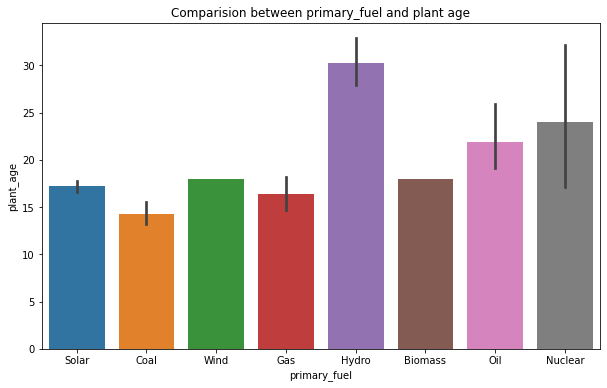

In [46]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and plant age")
sns.barplot(x = "primary_fuel", y = "plant_age", data = df)
plt.show()

#Findings:

-  older plants use hydro, nuclear and oil
-  younger plants use coal, gas, biomass, wind and solar

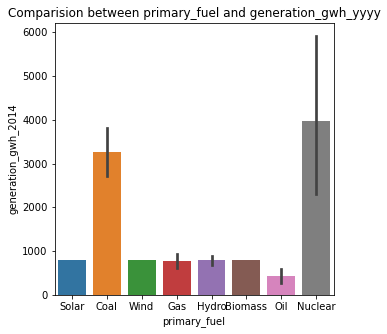

In [47]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()

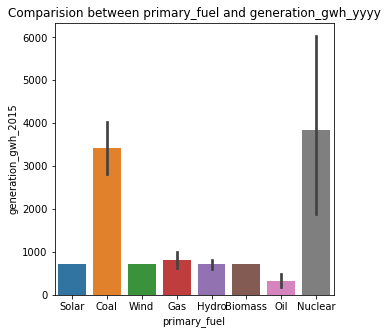

In [48]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()

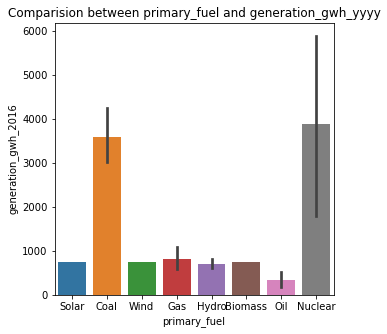

In [49]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()

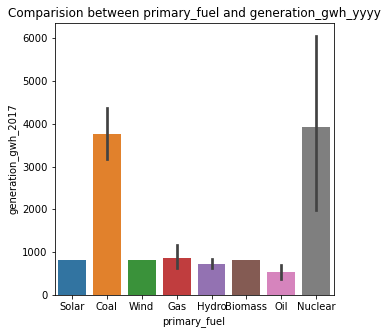

In [50]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()

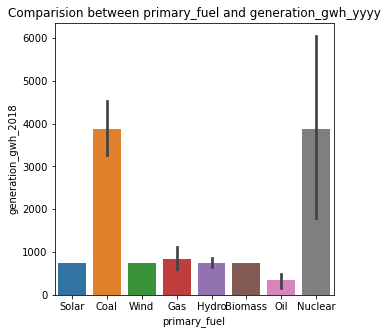

In [51]:
plt.figure(figsize = (5,5))
plt.title("Comparision between primary_fuel and generation_gwh_yyyy")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

#Findings:

-  nuclear and coal have high generation across all years
-  remaining fuel sources have comparatively lower generation figures

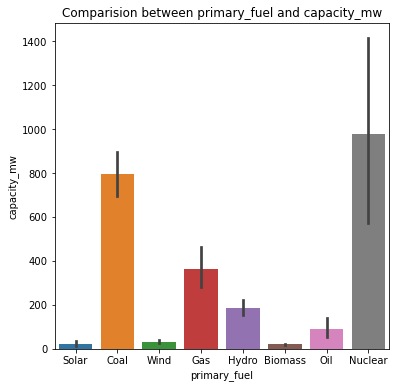

In [52]:
plt.figure(figsize = (6,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

#Finding: capacity of generating electricity is high in Nuclear and Coal plants, with very low capacity in solar, wind and biomass plants

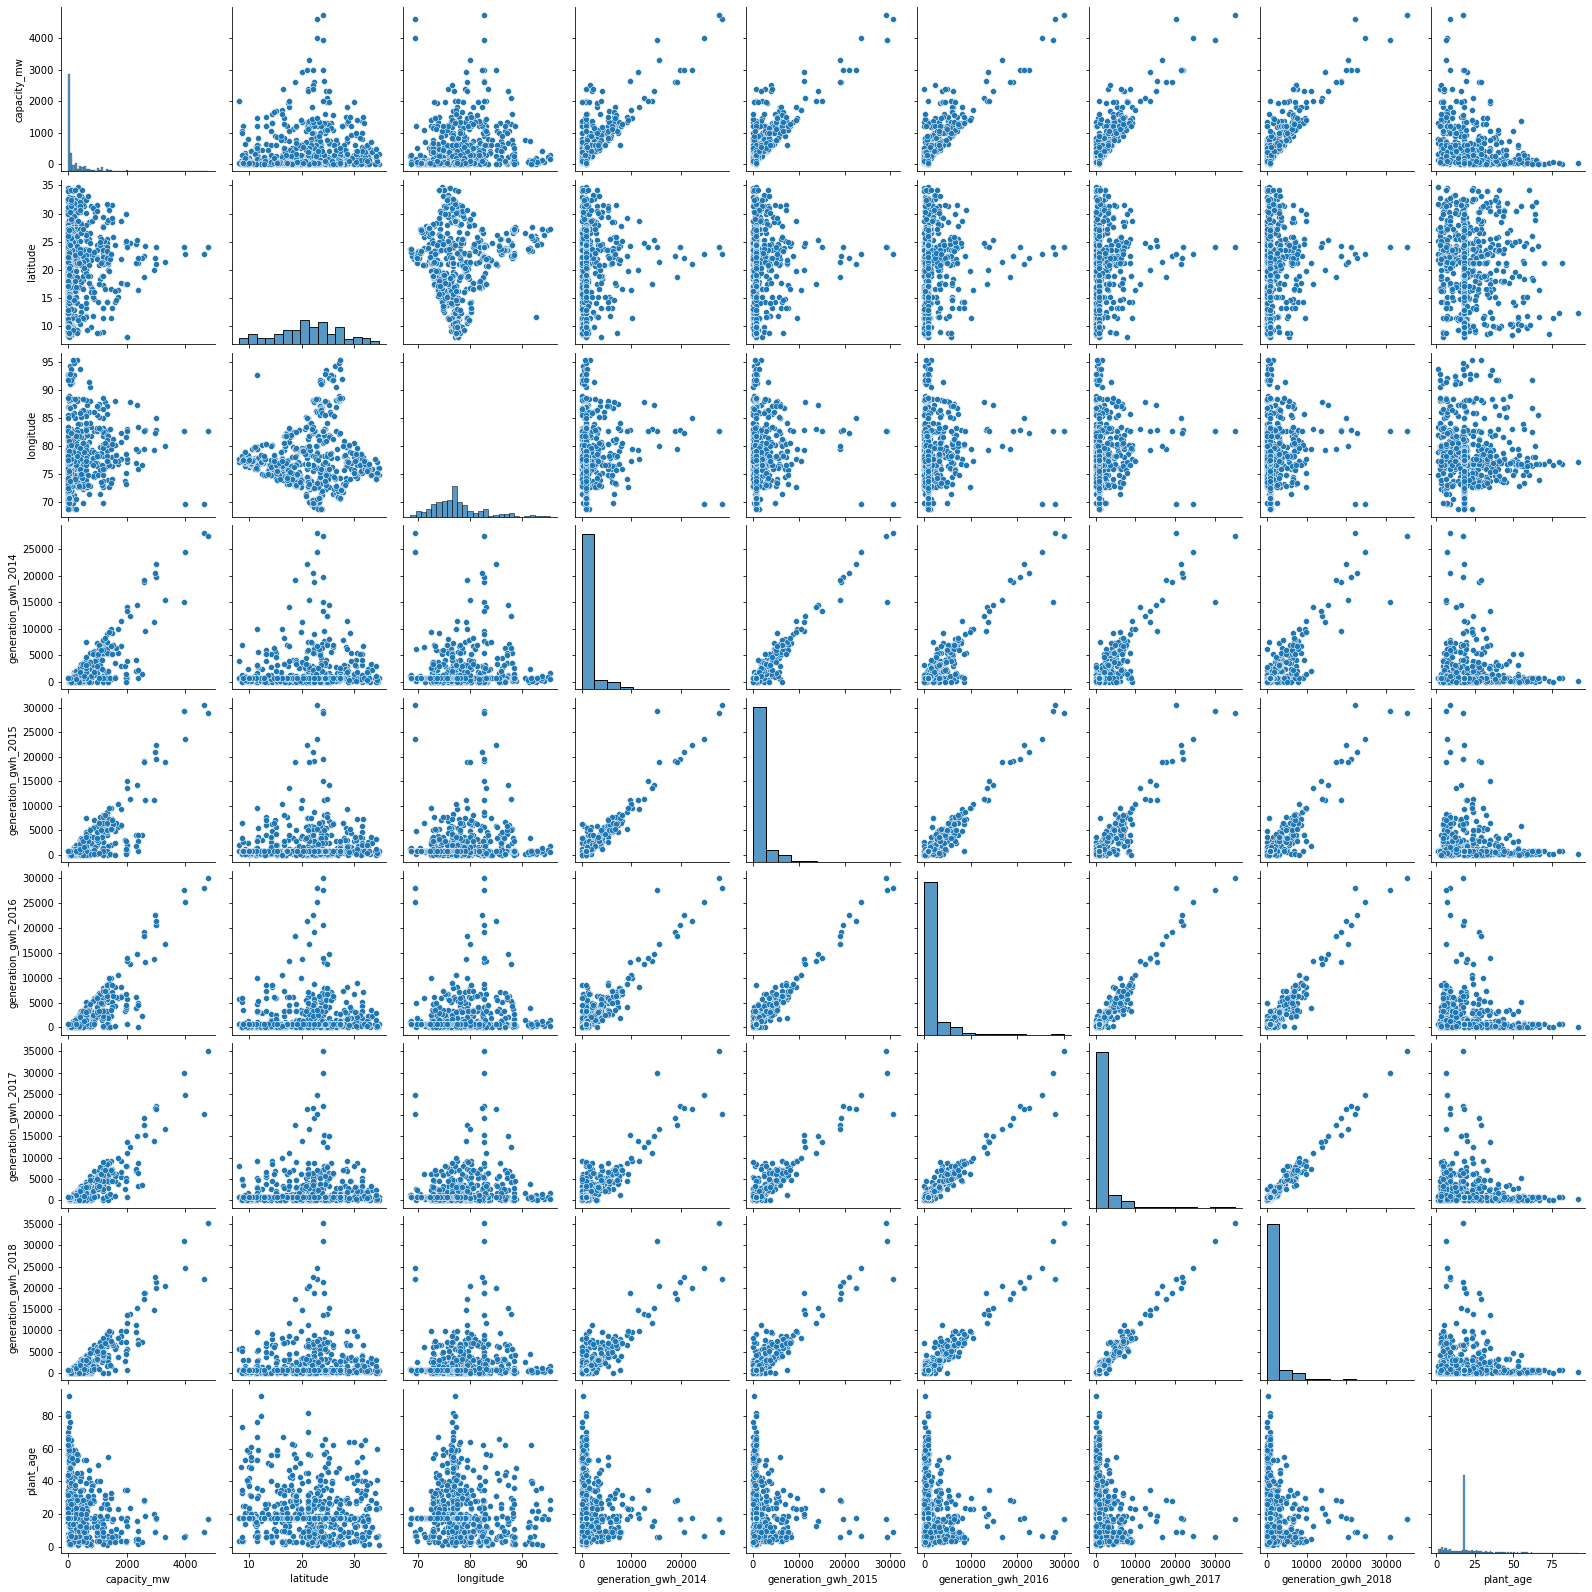

In [53]:
sns.pairplot(df)

#Findings:

-  gives the pairwise relation between the columns
-  features have strong linear relationship and correlation with each other
#interesting fact:

-  the plotting of latitudinal and longitudinal values of the power plants from the database bring out an approximate shape of India, considering the dataset pertains to information of power plants across India

# Outlier check

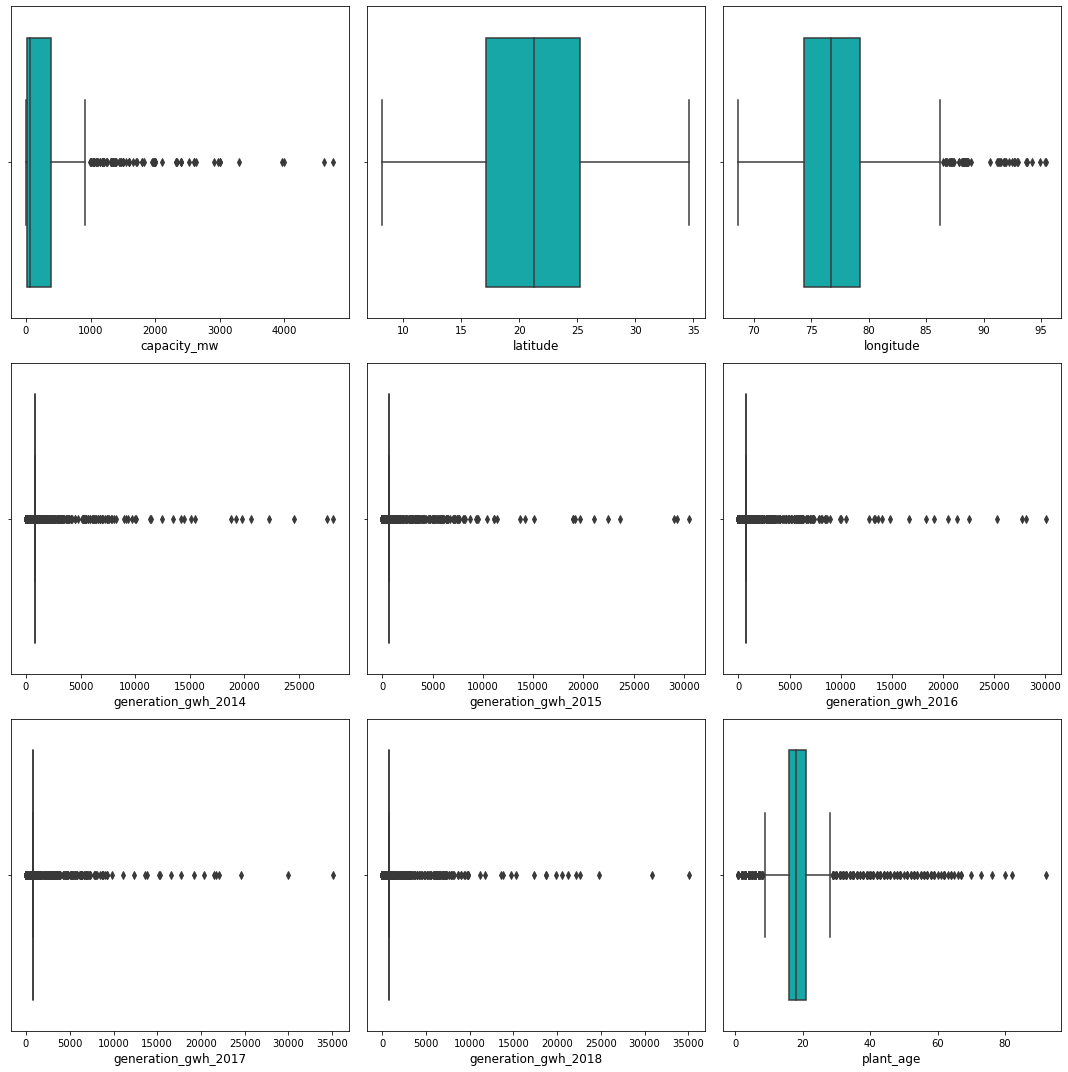

In [54]:
plt.figure(figsize=(15,15))
plotnumber=1
for col in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='c')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

All columns have outliers present in them, except for latitude

In [55]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']]


In [56]:

z=np.abs(zscore(features))
z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

In [57]:
new_df = df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


In [58]:
print(df.shape)
print(new_df.shape)

(907, 13)
(851, 13)


In [59]:
loss = (907-851)/907*100
loss

6.174200661521499

We have a data loss of 6.17%, which is acceptable

# Encoding categorical columns

In [60]:
categorical_col = ['primary_fuel','other_fuel1','source','geolocation_source']

In [61]:
lbl = LabelEncoder()
new_df[categorical_col] = new_df[categorical_col].apply(lbl.fit_transform)

In [62]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Establishing correlations

In [63]:
corr = new_df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


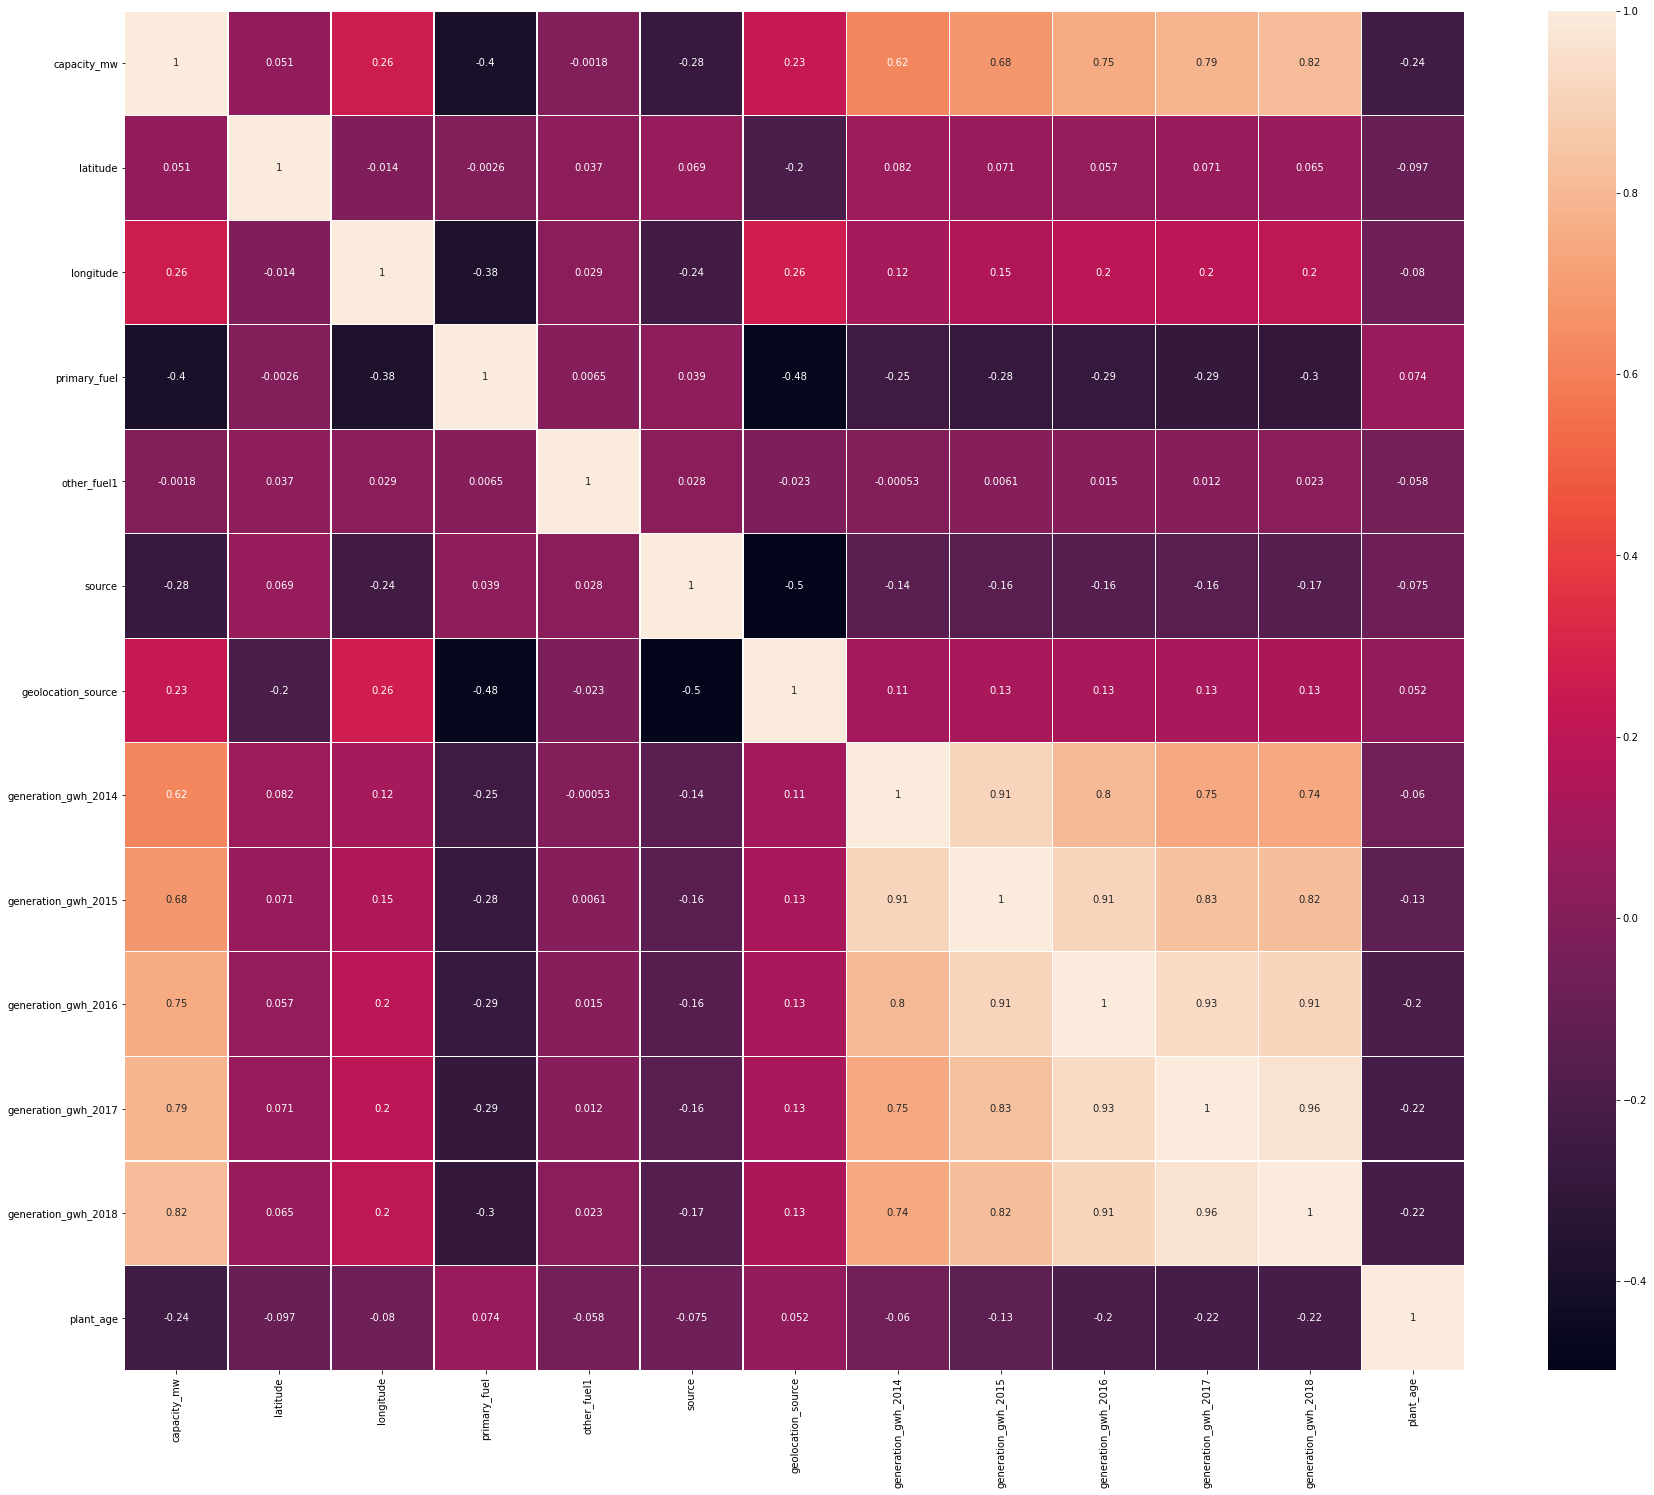

In [64]:
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=0.1,annot=True)
plt.show()

#Findings:

capacity_mw

-  capacity_mw is highly positively correlated with the features pertaining to generation_gwh
-  capacity_mw is negatively correlated to plant_age, source and primary_fuel
-  capacity_mw has very little correlation with other_fuel1 and lattitude

primary_fuel

-  primary_fuel has low correlation with plant_age, other_fuel1 and source
-  primary_fuel is negatively correlated with geological_source, longitude,capacity_mw, and generation_gwh_yyyy
-  primary_fuel has very little correlation with other_fuel1 and lattitude

# Correlation between capacity_mw and other features

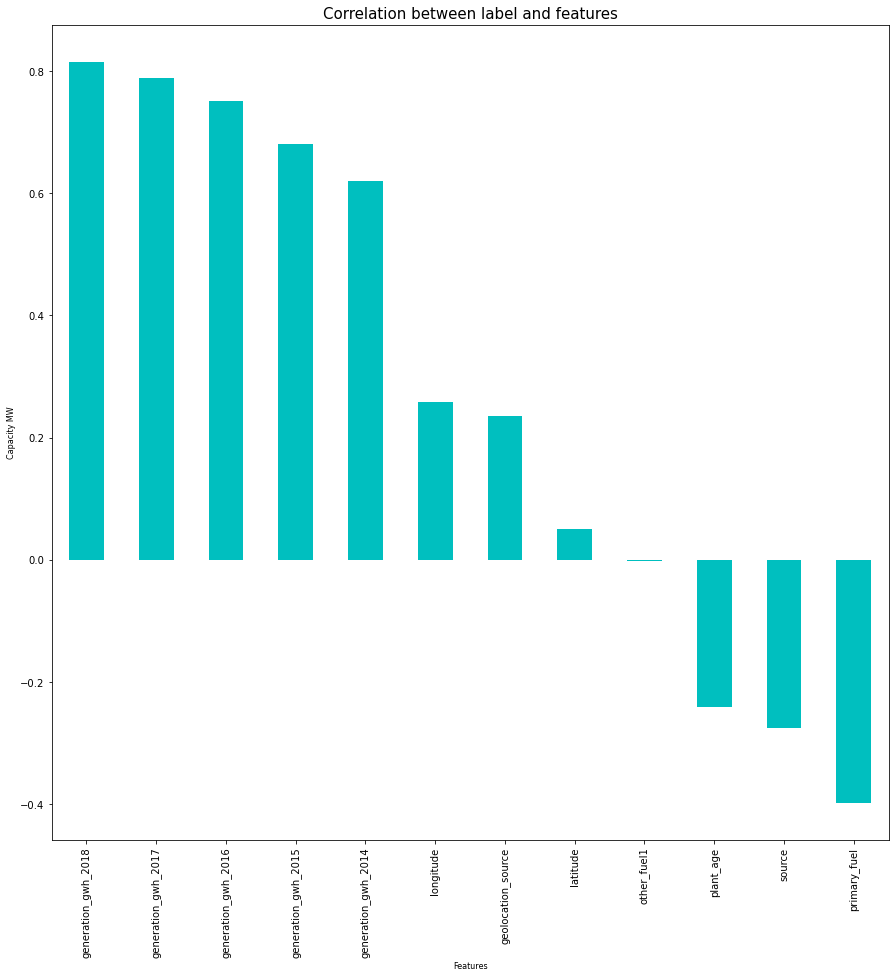

In [65]:
plt.figure(figsize=(15,15))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Capacity MW',fontsize=8)
plt.title('Correlation between label and features',fontsize=15)
plt.show()

# Correlation between primary_fuel and other features

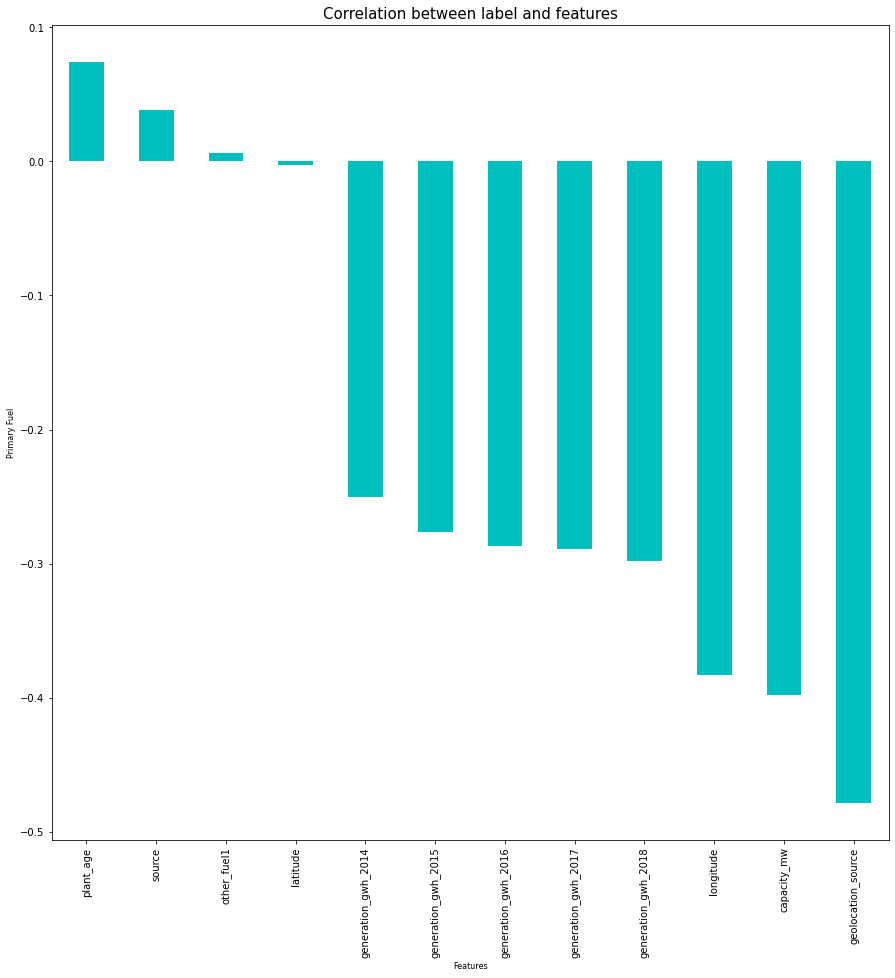

In [66]:
plt.figure(figsize=(15,15))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=8)
plt.ylabel('Primary Fuel',fontsize=8)
plt.title('Correlation between label and features',fontsize=15)
plt.show()

Findings: 
    
-  From the bar plots above, for each of the prediction required from the dataset, it is evident that latitude and other_fuel1 have very less correlation with the respective target columns. 

-  It would be safe to drop the columns.

In [67]:
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# Required prediction 1: capacity_mw

In [68]:
x = new_df.drop("capacity_mw",axis=1)
y = new_df['capacity_mw']

In [69]:
print(x.shape,"\n")
print(y.shape)

(851, 10) 

(851,)


Skewness check

In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            851 non-null    float64
 1   primary_fuel         851 non-null    int32  
 2   source               851 non-null    int32  
 3   geolocation_source   851 non-null    int32  
 4   generation_gwh_2014  851 non-null    float64
 5   generation_gwh_2015  851 non-null    float64
 6   generation_gwh_2016  851 non-null    float64
 7   generation_gwh_2017  851 non-null    float64
 8   generation_gwh_2018  851 non-null    float64
 9   plant_age            851 non-null    float64
dtypes: float64(7), int32(3)
memory usage: 63.2 KB


In [71]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [72]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']

scaler = PowerTransformer(method = 'yeo-johnson')

In [73]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [74]:
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

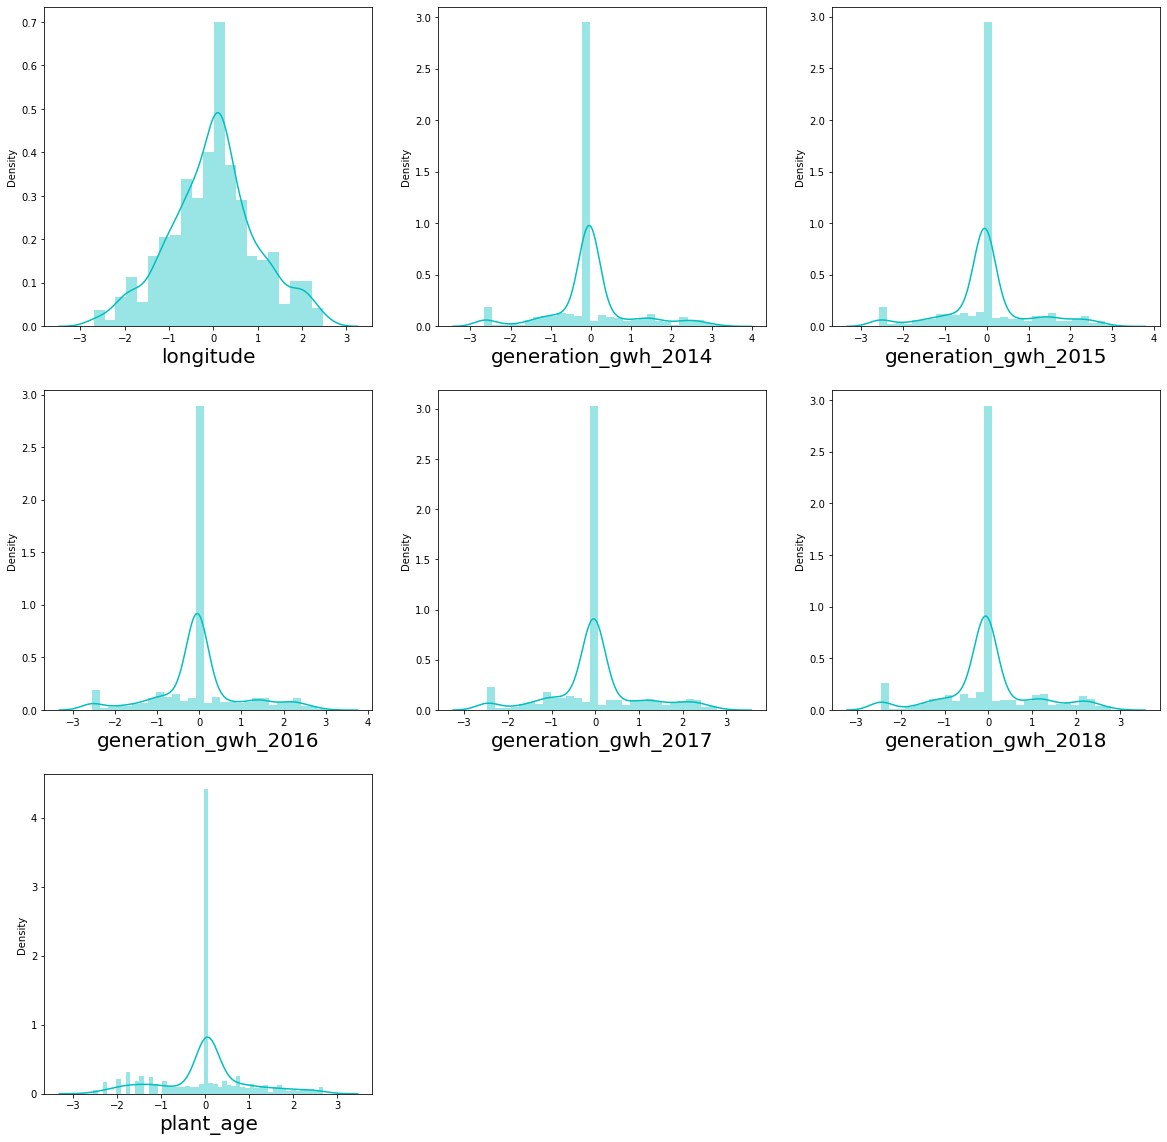

In [75]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

Skewness has been removed

# Using StandardScaler

In [76]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


# Multicollinearity Check

In [77]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.310001,longitude
1,1.682873,primary_fuel
2,1.503736,source
3,1.875773,geolocation_source
4,3.604587,generation_gwh_2014
5,6.181987,generation_gwh_2015
6,9.956820,generation_gwh_2016
7,9.749451,generation_gwh_2017
8,8.951311,generation_gwh_2018
9,1.103741,plant_age


All the features have a variance inflation factor of less than 10, so we are good to go as multicollinearity will not be an issue here.

# Model Building

In [78]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)

Maximum r2 score is  0.8679727098940545 at Random_state 84


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=maxRS)

In [80]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr = rfr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_rfr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_rfr))
print("MSE:",metrics.mean_squared_error(y_test,pred_rfr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))

R2_Score: 0.8529936102887862
MAE: 90.00006005257352
MSE: 24381.84905013469
RMSE: 156.14688293441753


In [81]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_dtr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_dtr))
print("MSE:",metrics.mean_squared_error(y_test,pred_dtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

R2_Score: 0.6940865820418449
MAE: 116.70251461988302
MSE: 50737.486946783625
RMSE: 225.24983229024528


In [82]:
# KNN Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_knn))
print("MAE:",metrics.mean_absolute_error(y_test,pred_knn))
print("MSE:",metrics.mean_squared_error(y_test,pred_knn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

R2_Score: 0.8446271068169022
MAE: 90.0952374269006
MSE: 25769.48141856187
RMSE: 160.52875573728798


In [83]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print("R2_Score:",r2_score(y_test,pred_gbr))
print("MAE:",metrics.mean_absolute_error(y_test,pred_gbr))
print("MSE:",metrics.mean_squared_error(y_test,pred_gbr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_gbr)))

R2_Score: 0.8584830604843073
MAE: 90.34041724288666
MSE: 23471.392393805952
RMSE: 153.20376103022392


# Model cross validation

In [84]:
print("Cross validation score for Random Forest Regressor:", cross_val_score(rfr,x,y,cv=5).mean(),"\n")
print("Cross validation score for Decision Tree Regressor:", cross_val_score(dtr,x,y,cv=5).mean(),"\n")
print("Cross validation score for KNN Regressor:", cross_val_score(knn,x,y,cv=5).mean(),"\n")
print("Cross validation score for Gradient Boosting Regressor:", cross_val_score(gbr,x,y,cv=5).mean())

Cross validation score for Random Forest Regressor: 0.7827709749206864 

Cross validation score for Decision Tree Regressor: 0.5794077026824703 

Cross validation score for KNN Regressor: 0.7243835664633714 

Cross validation score for Gradient Boosting Regressor: 0.7502231034352203


It is clearly evident from the R2 scores and the cross validation scores that Random Forest is the best model for the dataset.

# Hyperparameter Tuning

In [85]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,100],
             'max_depth':[2,4,5,6]}

In [86]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [87]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 100]})

In [88]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 100}

In [89]:
best_mod = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=100)

In [90]:
best_mod.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2')

In [91]:
rfr_pred = best_mod.predict(x_test)
acc = r2_score(y_test,rfr_pred)
print(acc*100)

87.95191627185513


Our Random Forest Regression model gives us an accuracy score of 85.48%

# Saving the model

In [92]:
joblib.dump(best_mod,"capacity-pred-global-power-plant-database.pkl")

['capacity-pred-global-power-plant-database.pkl']

In [93]:
load_mod=joblib.load("capacity-pred-global-power-plant-database.pkl")

In [94]:
print(load_mod.predict(x_test))

[1125.42473811 1209.90908403  887.20757071   29.3742196    52.82708773
 1415.58212417 1145.1948903  1428.87368026   43.85299535   42.20764251
  116.79454519  128.93391273  162.13524933   42.20764251   41.62646216
  174.18829263  339.19317095   42.75429005   94.90559061  561.50199221
   29.37065898  704.6581821    41.6489368    28.40510407   35.74396162
   43.85299535   51.62153992   43.01635448   43.85299535   41.73951951
  434.30902401   41.00846516   33.05392216   28.74949734  265.87879141
   33.05392216  232.7132002    33.05392216   32.56851214   75.06342504
  146.28760551   28.40510407   32.56851214   32.65840359  151.16950045
  319.90660521   41.62646216   28.00852095   32.86187928   75.45479898
 1469.32950615  154.48992959  733.85111194   33.05392216 1717.73459516
  628.06382101   98.79850584   41.00846516   32.17093886  215.38574728
  236.7218746    93.49649893   32.86187928  105.99879628   81.26532481
   41.73951951   43.41966172  978.36039503   33.05392216  231.69687453
   80.

In [95]:
a = np.array(y_test)
predicted = np.array(best_mod.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new

,Original,Predicted
0,1050.0,1125.424738
1,1650.0,1209.909084
2,720.0,887.207571
3,10.0,29.374220
4,5.0,52.827088
...,...,...
166,62.5,136.442556
167,22.5,33.053922
168,135.0,210.494527
169,600.0,737.784661


# Prediction 2: primary_fuel

In [96]:
x_pf = new_df.drop("primary_fuel",axis=1)
y_pf = new_df["primary_fuel"]

In [97]:
print(x_pf.shape,"\n")
print(y_pf.shape)

(851, 10) 

(851,)


# Skewness Check

In [98]:
x_pf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 906
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          851 non-null    float64
 1   longitude            851 non-null    float64
 2   source               851 non-null    int32  
 3   geolocation_source   851 non-null    int32  
 4   generation_gwh_2014  851 non-null    float64
 5   generation_gwh_2015  851 non-null    float64
 6   generation_gwh_2016  851 non-null    float64
 7   generation_gwh_2017  851 non-null    float64
 8   generation_gwh_2018  851 non-null    float64
 9   plant_age            851 non-null    float64
dtypes: float64(8), int32(2)
memory usage: 66.5 KB


In [99]:
x_pf.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
plant_age              1.280800
dtype: float64

In [100]:
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']
scaler = PowerTransformer(method='yeo-johnson')

In [101]:
x_pf[skew] = scaler.fit_transform(x_pf[skew].values)
x_pf[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [102]:
x_pf.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
plant_age              0.037156
dtype: float64

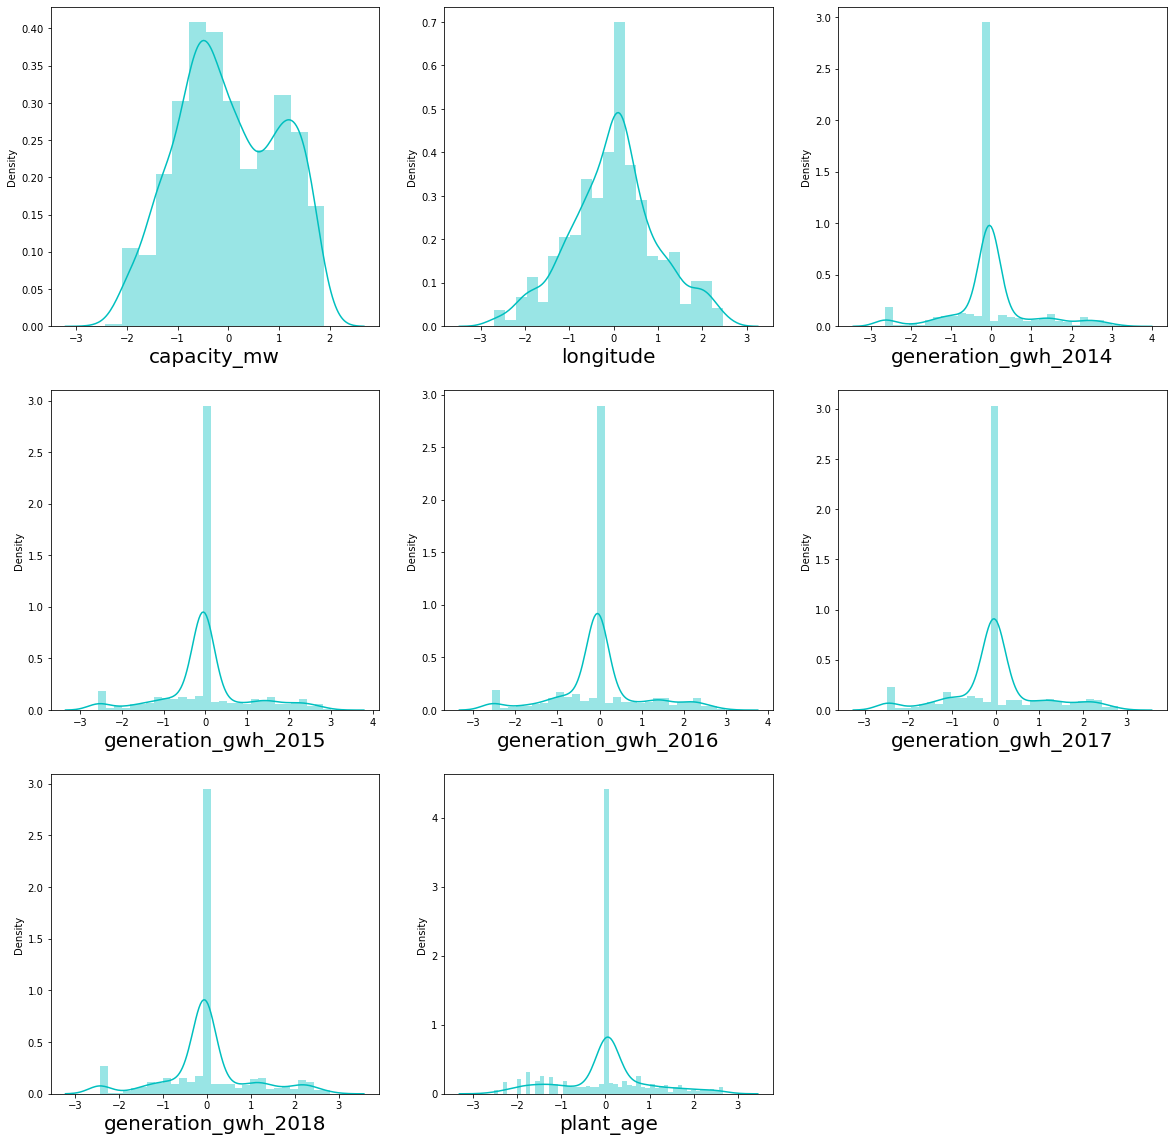

In [103]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in x_pf[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_pf[col],color='c')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()

Skewness is removed



In [104]:
scaler = StandardScaler()
x_pf = pd.DataFrame(scaler.fit_transform(x_pf),columns = x_pf.columns)
x_pf

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


Data bias has been removed

In [105]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_pf.values,i)
    for i in range(len(x_pf.columns))]
vif["Features"] = x_pf.columns
vif

,VIF values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,plant_age


#All the features have a variance inflation factor of less than 10, so we are good to go as multicollinearity will not be an issue here.

In [106]:
y_pf.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Findings:

-  primary_fuel has multiple classes, thereby creating a multiclassification prediction problem
-  data in primary_fuel does not appear to be balanced

In [107]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_pf,y_pf = SM.fit_resample(x_pf,y_pf)

In [108]:
y_pf.value_counts()

0    238
1    238
2    238
3    238
4    238
5    238
6    238
7    238
Name: primary_fuel, dtype: int64

In [109]:
x_pf.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


# Model Building

In [110]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_pf_train,y_pf_train)
    pred = DTC.predict(x_pf_test)
    acc = accuracy_score(y_pf_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.905511811023622 at random_state 29


In [111]:
x_pf_train,x_pf_test,y_pf_train,y_pf_test = train_test_split(x_pf,y_pf,test_size=.20,random_state=maxRS)

# Decision tree classifier

In [112]:
DTC = DecisionTreeClassifier()
DTC.fit(x_pf_train,y_pf_train)
predDTC = DTC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predDTC))
print(confusion_matrix(y_pf_test,predDTC))
print(classification_report(y_pf_test,predDTC))

0.905511811023622
[[38  3  0  0  0  0  0  0]
 [ 1 42  2  4  2  1  0  0]
 [ 0  2 47  3  1  2  0  0]
 [ 0  6  6 47  0  1  0  0]
 [ 0  0  1  0 42  0  0  0]
 [ 0  0  1  0  0 38  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.79      0.81      0.80        52
           2       0.82      0.85      0.84        55
           3       0.87      0.78      0.82        60
           4       0.93      0.98      0.95        43
           5       0.90      0.97      0.94        39
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        48

    accuracy                           0.91       381
   macro avg       0.91      0.92      0.91       381
weighted avg       0.91      0.91      0.91       381



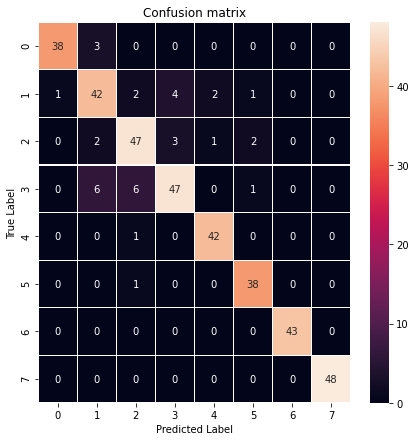

In [113]:
cm = confusion_matrix(y_pf_test,predDTC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

# Random Forest Classifier

In [114]:
RFC = RandomForestClassifier()
RFC.fit(x_pf_train,y_pf_train)
predRFC = RFC.predict(x_pf_test)
print(accuracy_score(y_pf_test,predRFC))
print(confusion_matrix(y_pf_test,predRFC))
print(classification_report(y_pf_test,predRFC))

0.916010498687664
[[40  1  0  0  0  0  0  0]
 [ 1 36  2  8  1  3  0  1]
 [ 0  3 47  1  0  4  0  0]
 [ 0  2  2 54  1  1  0  0]
 [ 0  0  0  0 43  0  0  0]
 [ 0  0  1  0  0 38  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.86      0.69      0.77        52
           2       0.90      0.85      0.88        55
           3       0.86      0.90      0.88        60
           4       0.96      1.00      0.98        43
           5       0.83      0.97      0.89        39
           6       1.00      1.00      1.00        43
           7       0.98      1.00      0.99        48

    accuracy                           0.92       381
   macro avg       0.92      0.92      0.92       381
weighted avg       0.92      0.92      0.91       381



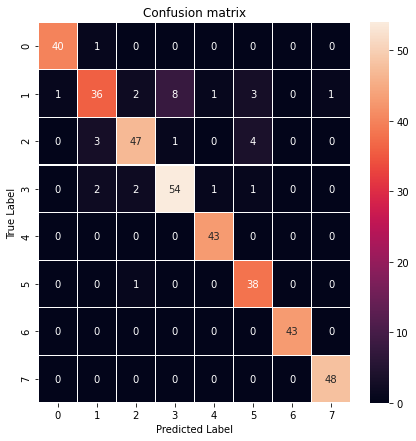

In [115]:
cm = confusion_matrix(y_pf_test,predRFC)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

# SVC

In [116]:
svc = SVC()
svc.fit(x_pf_train,y_pf_train)
predsvc = svc.predict(x_pf_test)
print(accuracy_score(y_pf_test,predsvc))
print(confusion_matrix(y_pf_test,predsvc))
print(classification_report(y_pf_test,predsvc))

0.7716535433070866
[[37  0  0  0  0  0  0  4]
 [ 7 28  1  3  5  3  0  5]
 [ 1  2 28  2  5 15  0  2]
 [ 0  3 10 32  3  0  0 12]
 [ 0  0  1  1 41  0  0  0]
 [ 0  1  0  0  0 37  0  1]
 [ 0  0  0  0  0  0 43  0]
 [ 0  0  0  0  0  0  0 48]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.82      0.54      0.65        52
           2       0.70      0.51      0.59        55
           3       0.84      0.53      0.65        60
           4       0.76      0.95      0.85        43
           5       0.67      0.95      0.79        39
           6       1.00      1.00      1.00        43
           7       0.67      1.00      0.80        48

    accuracy                           0.77       381
   macro avg       0.79      0.80      0.77       381
weighted avg       0.79      0.77      0.76       381



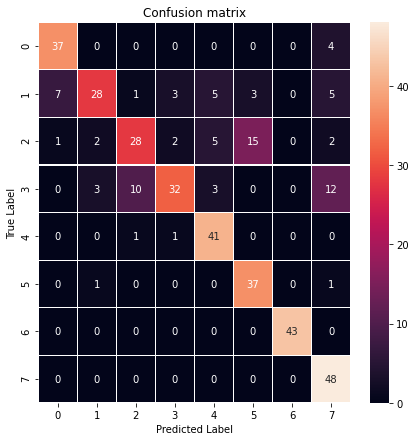

In [117]:
cm = confusion_matrix(y_pf_test,predsvc)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

# KNeighbors Classifier

In [118]:
knn = KNeighborsClassifier()
knn.fit(x_pf_train,y_pf_train)
predknn = knn.predict(x_pf_test)
print(accuracy_score(y_pf_test,predknn))
print(confusion_matrix(y_pf_test,predknn))
print(classification_report(y_pf_test,predknn))

0.8110236220472441
[[38  1  0  0  0  0  0  2]
 [ 3 29  3  5  3  5  0  4]
 [ 2  2 38  1  1 10  0  1]
 [ 1  6  9 37  0  0  0  7]
 [ 0  0  2  1 40  0  0  0]
 [ 0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0 43  0]
 [ 3  0  0  0  0  0  0 45]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.76      0.56      0.64        52
           2       0.73      0.69      0.71        55
           3       0.84      0.62      0.71        60
           4       0.91      0.93      0.92        43
           5       0.72      1.00      0.84        39
           6       1.00      1.00      1.00        43
           7       0.76      0.94      0.84        48

    accuracy                           0.81       381
   macro avg       0.82      0.83      0.82       381
weighted avg       0.81      0.81      0.80       381



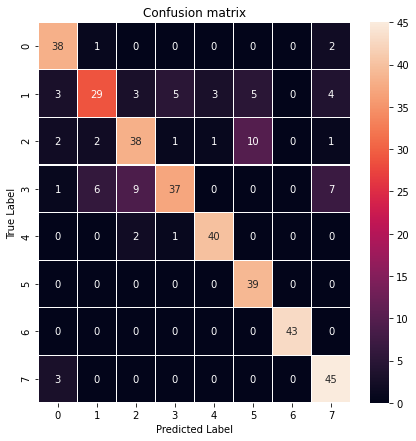

In [119]:
cm = confusion_matrix(y_pf_test,predknn)
x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=.2,fmt=".0f",ax=ax,xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()

# Model Cross Validation

In [120]:
print("Cross Validation Score for Decision Tree Classifier:", cross_val_score(DTC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for Random Forest Classifier:", cross_val_score(RFC,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for SVC:", cross_val_score(svc,x_pf,y_pf,cv=5).mean(),"\n")
print("Cross Validation Score for KNN Classifier:", cross_val_score(knn,x_pf,y_pf,cv=5).mean())

Cross Validation Score for Decision Tree Classifier: 0.8702735184417737 

Cross Validation Score for Random Forest Classifier: 0.9149122807017545 

Cross Validation Score for SVC: 0.7909600773587512 

Cross Validation Score for KNN Classifier: 0.8497858820279045


### It is observed from the accuracy scores and the cross validation scores that Random Forest Classifier is the best model for the dataset.

# Hyperparameter Tuning

In [121]:
parameters = {'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2'],
              'max_depth':[10,20,30],
              'min_samples_leaf':[2,3,5]}

In [122]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [123]:
GCV.fit(x_pf_train,y_pf_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 5]})

In [124]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 2}

In [125]:
best_mod1 = RandomForestClassifier(criterion='entropy',max_features='auto',max_depth=20,min_samples_leaf=3)
best_mod1.fit(x_pf_train, y_pf_train)
pred = best_mod1.predict(x_pf_test)
acc = accuracy_score(y_pf_test,pred)
print(acc*100)

88.71391076115486


# Saving the model

In [126]:
joblib.dump(best_mod1,"primaryfuel-pred-global-power-plant-database.pkl")

['primaryfuel-pred-global-power-plant-database.pkl']

In [127]:
model = joblib.load('primaryfuel-pred-global-power-plant-database.pkl')

In [128]:
a = np.array(y_pf_test)
predicted = np.array(model.predict(x_pf_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_new

,Original,Predicted
0,0,0
1,7,7
2,1,1
3,0,0
4,7,7
...,...,...
376,6,6
377,6,6
378,5,5
379,2,5
